# 분석 과제 설명 
## 클로젯셰어 수행 과제 : 신규 구매 전반 분석 및 결과 도식화

## 분석 자료 : 최근 3개월간 신규 구매 데이터 일부

## 분석 필요 내용

1. 구매 소요 시간 분석  
1-1. 가입일로부터 구매일까지 전환된 소요시간 분석
         ㄴ 최근 3개월 전체 분석 / 각 월 별 분석
         ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석
            ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과
2. 구매 상품 트렌드 분석  
2-1. 유저당 주문 수량 분석
         ㄴ 최근 3개월 전체 분석 / 각 월 별 분석
         ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석  
  
    2-2. 주문 아이템 분석  
         ㄴ 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
         ㄴ 신규 유저들의 구매 트렌드 파악  
         
3. 분석 내용 토대로 인사이트 도출  
3-1. 분석 내용 도식화
         ㄴ 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)
         ㄴ 유사성을 갖는 결과에 대하여 그룹화  
3-2. 인사이트 도출
         ㄴ 해당 결과를 통해 나타나는 사항 정리
         ㄴ 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)

## 분석 참고 사항
- brandnm : 아이템 브랜드명  
- goodsnm : 아이템 명  
- USER : 개별 유저 식별 값  
- reg_date : 개별 유저 가입일  
- order_date : 아이템 주문일  
- p_type : 주문 상품 종류  
- 7days (7일권) / 4days (4일권)  
- sub_type : 주문 상품 카테고리  : BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TB – 투피스  
- app_yn : 어플리케이션 사용 여부  
- Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용



# Data Explore

## Library 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import missingno as msno


from math import ceil

from datetime import datetime, timezone, timedelta
pd.options.display.max_rows=1000

plt.rcParams['font.family']='AppleGothic'
sns.set_style(style="darkgrid")

In [2]:
path = '../../project_closetshare'
data = pd.read_excel(path+'/closet_db.xlsx')

## Dataset Shape 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1468 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1471 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [4]:
data.app_yn.fillna('N', inplace=True)

In [5]:
data.shape

(1471, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1468 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1471 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1471 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


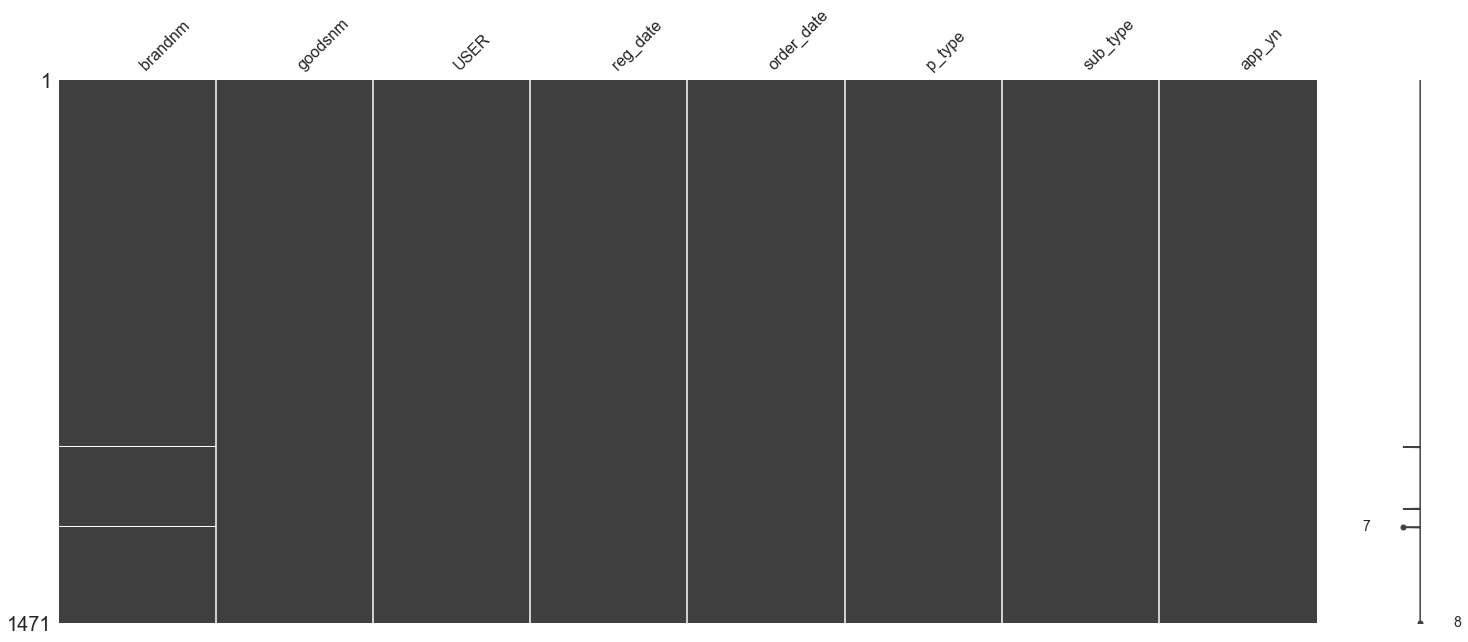

In [7]:
msno.matrix(data);

# Basic EDA   
## 유저 정보   
- 총 1234명의 유저, 1471명의 구매 정보  
- 2021년 신규 고객이 주를 이루며 기존 고객도 있음. 

In [8]:
print(f'데이터셋에 있는 유저의 수(동일인물 포함) : {data["USER"].count()}')
print(f'데이터셋에 있는 유저의 수(동일인물 배제) : {data["USER"].nunique()}')

데이터셋에 있는 유저의 수(동일인물 포함) : 1471
데이터셋에 있는 유저의 수(동일인물 배제) : 1234


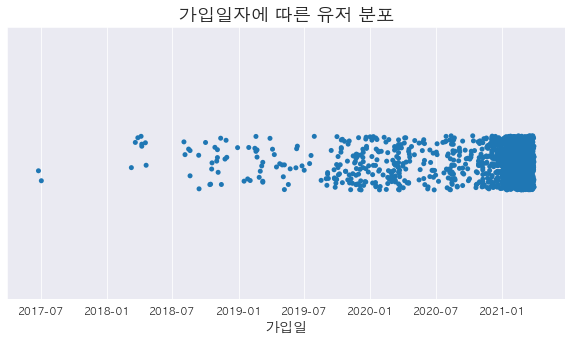

In [9]:
plt.rcParams['font.family']='AppleGothic'
plt.figure(figsize=(10,5))
sns.stripplot(x='reg_date',data=data)
plt.title('가입일자에 따른 유저 분포', fontsize=18)
plt.xlabel('가입일', fontsize=14);

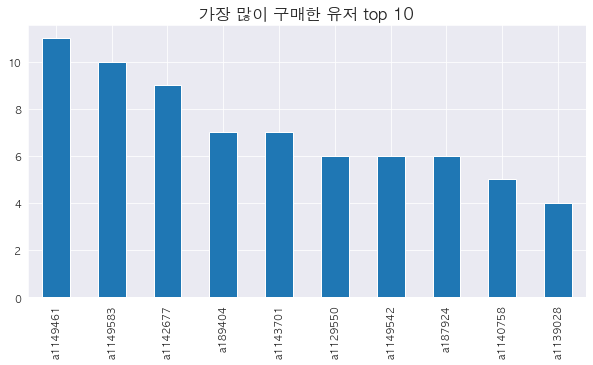

In [10]:
data.USER.value_counts()[:10].plot(kind='bar', figsize=(10,5))
plt.title('가장 많이 구매한 유저 top 10', fontsize=16);

## 대여 주문 정보   
- 2021년 1~3월 주문 정보 존재

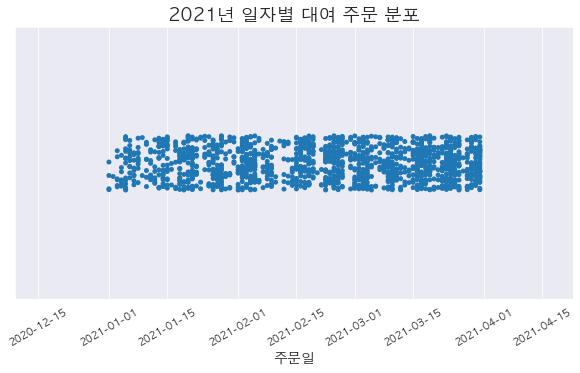

In [11]:
plt.figure(figsize=(10,5))
sns.stripplot(x='order_date',data=data)
plt.title('2021년 일자별 대여 주문 분포', fontsize=18)
plt.xticks(rotation=30)
plt.xlabel('주문일', fontsize=14);

In [12]:
f = plt.figure(figsize=(15,8))
sns.boxplot(x='reg_date_ym', y='order_count', data=data_order, hue='order_date_ym')
plt.title('가입월 기준 주문 수량(구매 월별)', fontsize=16)
plt.ylabel('주문 수량', fontsize=11)
plt.xlabel('가입월(년-월)', fontsize=11)
plt.xticks(rotation=45)
plt.grid()
plt.show();

NameError: name 'data_order' is not defined

<Figure size 1080x576 with 0 Axes>

## 주문시 이용권 및 앱 사용 현황  
- 4일권이 7일권보다 많음  
- 주문시 앱을 주로 사용함 

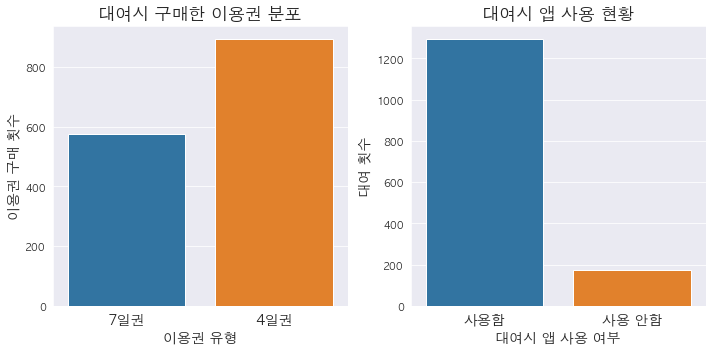

In [13]:
f, axes=plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='p_type', data=data, ax=axes[0])
axes[0].set_title('대여시 구매한 이용권 분포', fontsize=17)
axes[0].set_xlabel('이용권 유형', fontsize=14)
axes[0].set_ylabel('이용권 구매 횟수', fontsize=14)
axes[0].set_xticklabels(['7일권', '4일권'], fontsize=14)

sns.countplot(x='app_yn', data=data, ax=axes[1])
axes[1].set_title('대여시 앱 사용 현황', fontsize=17)
axes[1].set_xlabel('대여시 앱 사용 여부', fontsize=14)
axes[1].set_ylabel('대여 횟수', fontsize=14)
axes[1].set_xticklabels(['사용함', '사용 안함'], fontsize=14)

plt.tight_layout();

## 브랜드 Top 10 

In [14]:
# 가입날짜 - 그 해, 그 달 n주차 
data['reg_date_ym']=data['reg_date'].dt.strftime('%y-%m')
data['reg_date_w']='NaN'

#당월 n주차 구하는 함수 
def week_of_month(dt):

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

#당월 n주차 구하기
for idx, (y, m, n) in enumerate(zip(data.reg_date.dt.year, data.reg_date.dt.month, data.reg_date.dt.day)) :
    temp_week=week_of_month(datetime(y,m,n))
    data['reg_date_w'].iloc[idx]= temp_week

data['reg_date_ymw']=data.reg_date_ym+'-'+data.reg_date_w.astype(str)


data['order_date_ym']=data['order_date'].dt.strftime('%y-%m')
data['order_date_w']=0
for idx, (y, m, n) in enumerate(zip(data.order_date.dt.year, data.order_date.dt.month, data.order_date.dt.day)) :
    temp_week=week_of_month(datetime(y,m,n))
    data['order_date_w'].iloc[idx]= temp_week

data['order_date_ymw']=data.order_date_ym+'-'+data.order_date_w.astype(str)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


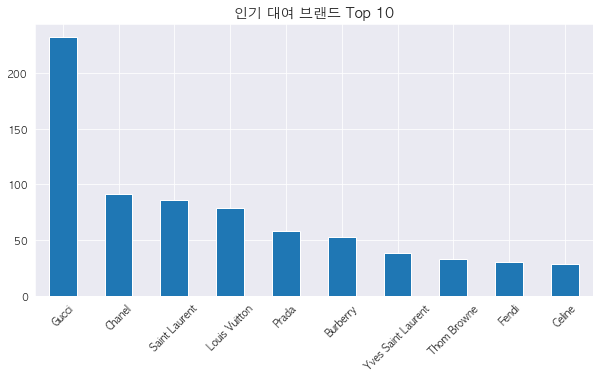

In [15]:
#Top 10 
data['brandnm'].value_counts()[:10].plot(kind='bar', figsize=(10,5), grid=True )
plt.title('인기 대여 브랜드 Top 10', fontsize=14)
plt.xticks(rotation=45);

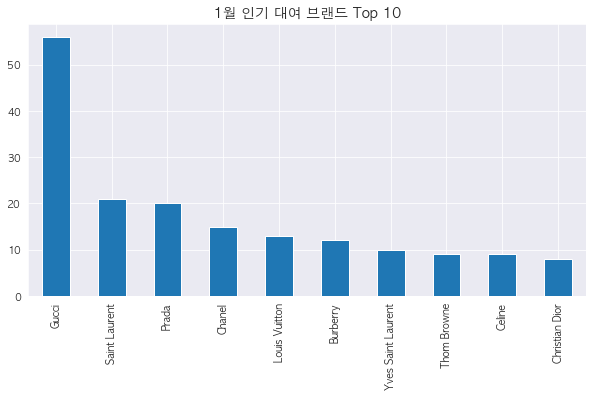

In [16]:
data[data['order_date_ym']=='21-01']['brandnm'].value_counts()[:10].plot(kind='bar', \
                                        figsize=(10,5), grid=True)
plt.title('1월 인기 대여 브랜드 Top 10', fontsize=14);

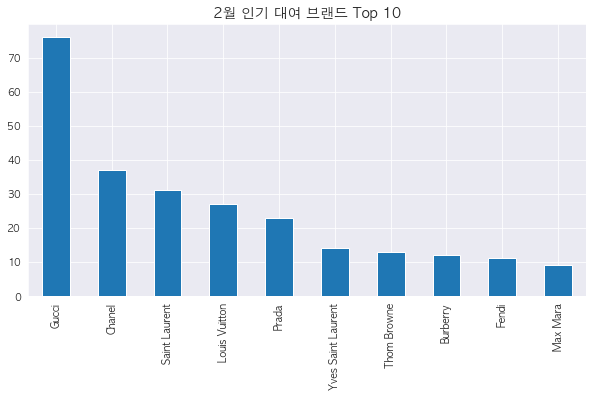

In [17]:
data[data['order_date_ym']=='21-02']['brandnm'].value_counts()[:10].plot(kind='bar', \
                                        figsize=(10,5), grid=True)
plt.title('2월 인기 대여 브랜드 Top 10', fontsize=14);

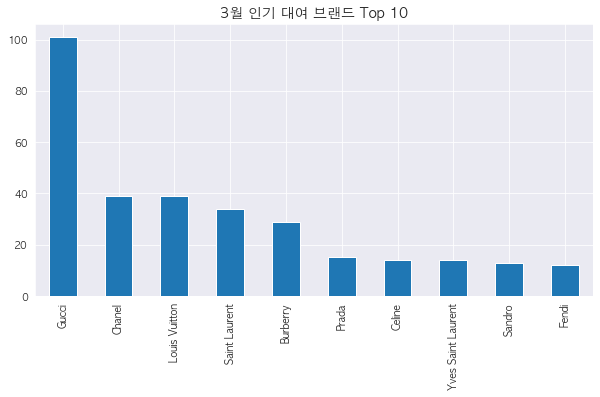

In [18]:
data[data['order_date_ym']=='21-03']['brandnm'].value_counts()[:10].plot(kind='bar', \
                                        figsize=(10,5), grid=True)
plt.title('3월 인기 대여 브랜드 Top 10', fontsize=14);

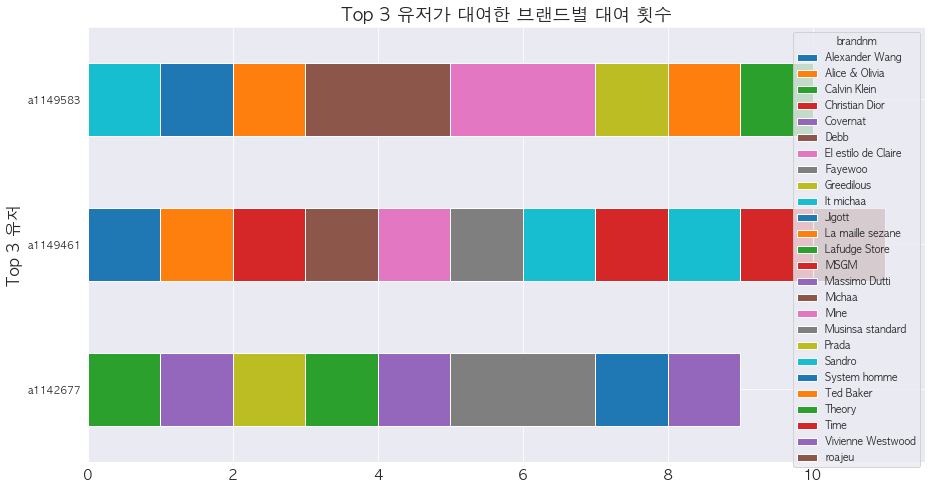

In [19]:
#가장 구매를 많이 한 유저 3명이 대여한 브랜드
temp3=pd.DataFrame(data.groupby(['USER', 'brandnm'])['brandnm'].count())
temp3.columns=['count']
temp3=temp3.reset_index()
top3_user=list(data.USER.value_counts()[:3].index)
top3_brand_df=temp3[temp3['USER'].isin(top3_user)]
top3_brand_df.pivot(index='USER', columns='brandnm', values='count').plot(kind='barh', stacked=True, figsize=(15,8))
plt.xticks(fontsize=14)
plt.ylabel('Top 3 유저', fontsize=16)
plt.title('Top 3 유저가 대여한 브랜드별 대여 횟수', fontsize=18);

## 아이템  Top 10 

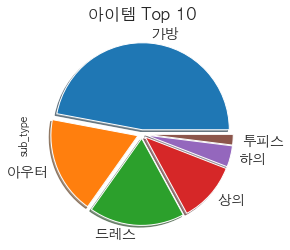

In [20]:
labels=['가방','아우터','드레스','상의','하의','투피스']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

data['sub_type'].value_counts().plot(kind='pie', labels=labels, \
                                     explode=explode,shadow=True, fontsize=14)
plt.title('아이템 Top 10', fontsize=16); 

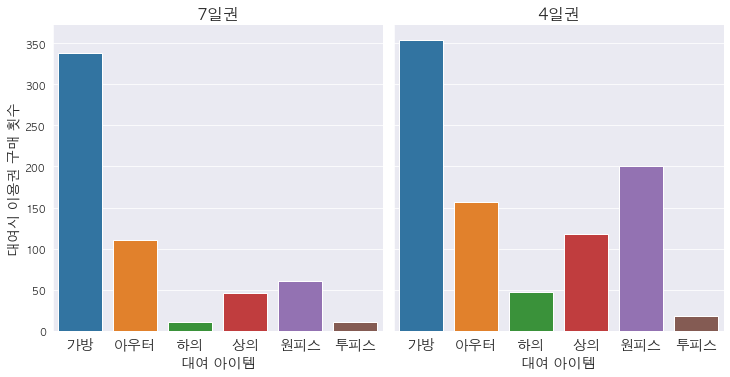

In [21]:
#이용권과 함께 보기 
g=sns.catplot(x='sub_type', col='p_type', kind='count',data=data)
axes = g.axes.flatten()
axes[0].set_title("7일권", fontsize=16)
axes[1].set_title("4일권", fontsize=16)

g.set_ylabels('대여시 이용권 구매 횟수', fontsize=14)
g.set_xticklabels(['가방', '아우터','하의','상의','원피스', '투피스'], fontsize=14)
g.set_xlabels('대여 아이템', fontsize=14);

In [22]:
#아이템과 top 10 브랜드 함께 보기 
#Top 10 
temp=pd.DataFrame(data.groupby(['brandnm','sub_type'])['USER'].count())
temp.reset_index(inplace=True)
top10=list(data.brandnm.value_counts()[:10].index)
top10_df=temp[temp['brandnm'].isin(top10)]

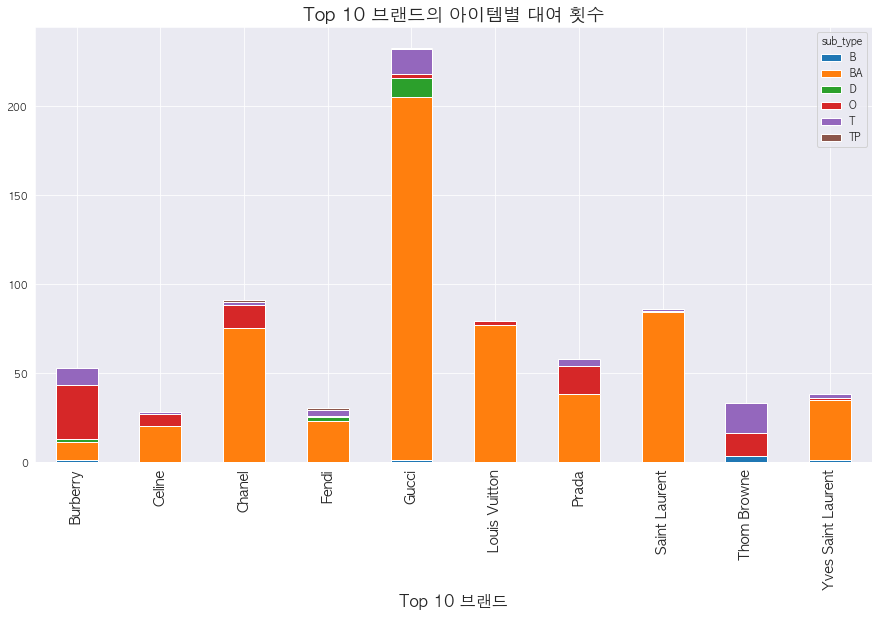

In [23]:
top10_df.pivot(index='brandnm', columns='sub_type', values='USER').plot(kind='bar', stacked=True, figsize=(15,8))
plt.xticks(fontsize=14)
plt.xlabel('Top 10 브랜드', fontsize=16)
plt.title('Top 10 브랜드의 아이템별 대여 횟수', fontsize=18);

In [24]:
#가장 구매를 많이 한 유저 10명이 대여한 아이템 
temp2=pd.DataFrame(data.groupby(['USER', 'sub_type'])['sub_type'].count())
temp2.columns=['count']
temp2=temp2.reset_index()

In [25]:
top10_user=list(data.USER.value_counts()[:10].index)
top10_user_df=temp2[temp2['USER'].isin(top10_user)]

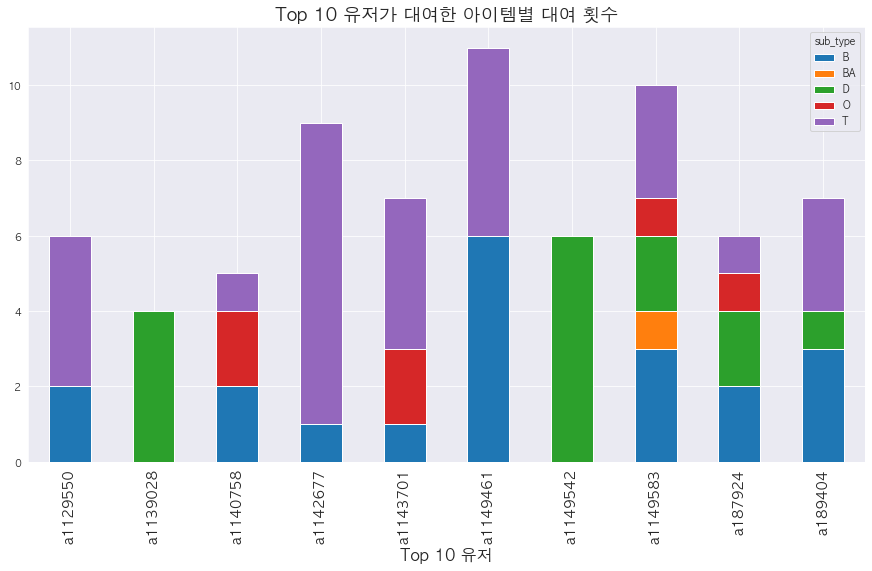

In [26]:
top10_user_df.pivot(index='USER', columns='sub_type', values='count').plot(kind='bar', stacked=True, figsize=(15,8))
plt.xticks(fontsize=14)
plt.xlabel('Top 10 유저', fontsize=16)
plt.title('Top 10 유저가 대여한 아이템별 대여 횟수', fontsize=18);

In [27]:
top10_user_df

,USER,sub_type,count
125,a1129550,B,2
126,a1129550,T,4
211,a1139028,D,4
246,a1140758,B,2
247,a1140758,O,2
248,a1140758,T,1
309,a1142677,B,1
310,a1142677,T,8
356,a1143701,B,1
357,a1143701,O,2


## 분석
### 구매 소요 시간 분석  
1-1. 가입일로부터 구매일까지 전환된 소요시간 분석  
ㄴ 최근 3개월 전체 분석 / 각 월 별 분석  
ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석  
ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과  
  
- 1,2,3월별 가입일로부터 구매일까지 기간   
- 각 월별 가입일 1일 이내 전환 유저 비교  

#### 2021 1월~3월 신규 가입자 가입일(n주차)로부터 구매일(n주차)까지 리텐션율 

In [ ]:
# 동일 경험 (코호트집단) 만들기 : 가입 날짜 
# 가입날짜 - 그 해, 그 달 n주차 
data['reg_date_ym']=data['reg_date'].dt.strftime('%y-%m')
data['reg_date_w']='NaN'

#당월 n주차 구하는 함수 
def week_of_month(dt):

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

#당월 n주차 구하기
for idx, (y, m, n) in enumerate(zip(data.reg_date.dt.year, data.reg_date.dt.month, data.reg_date.dt.day)) :
    temp_week=week_of_month(datetime(y,m,n))
    data['reg_date_w'][idx]= temp_week

data['reg_date_ymw']=data.reg_date_ym+'-'+data.reg_date_w.astype(str)

In [ ]:
data['order_date_ym']=data['order_date'].dt.strftime('%y-%m')
data['order_date_w']=0
for idx, (y, m, n) in enumerate(zip(data.order_date.dt.year, data.order_date.dt.month, data.order_date.dt.day)) :
    temp_week=week_of_month(datetime(y,m,n))
    data['order_date_w'][idx]= temp_week

data['order_date_ymw']=data.order_date_ym+'-'+data.order_date_w.astype(str)

In [ ]:
cohort_df=data.copy()
drop_cols=['brandnm', 'goodsnm', 'reg_date', 'p_type','sub_type','app_yn','reg_date_ym','order_date_w','reg_date_w','order_date_ym']
cohort_df=cohort_df.drop(drop_cols,1)
cohort_df.reset_index(inplace=True)
cohort_df.head()

In [ ]:
grouped=cohort_df.groupby(['reg_date_ymw', 'order_date_ymw'])

In [ ]:
#가입일자별 주문일자(연도-월-n주차)
cohorts=grouped['USER'].nunique()

In [ ]:
cohorts=cohorts.reset_index()
cohorts.rename({'UserId':'TotalUsers'},axis=1,inplace=True)
cohorts.head()

In [ ]:
# 결측치 행 삽입 
def insert_row(df, idx, reg, order):
    new_data={}
    new_data['reg_date_ymw']=reg
    new_data['order_date_ymw']=order
    new_data['USER']=0

    idx = idx 

    temp1 = df[df.index < idx]
    temp2 = df[df.index >= idx]
    df = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
    
    return df

In [ ]:
cohorts=insert_row(cohorts, 312, '21-01-1','21-02-1')
cohorts=insert_row(cohorts, 314, '21-01-1','21-02-3')
cohorts=insert_row(cohorts, 315, '21-01-1','21-02-4')
cohorts=insert_row(cohorts, 316, '21-01-1','21-03-1')
cohorts=insert_row(cohorts, 317, '21-01-1','21-03-2')
cohorts=insert_row(cohorts, 318, '21-01-1','21-03-3')
cohorts=insert_row(cohorts, 319, '21-01-1','21-03-4')
cohorts=insert_row(cohorts, 320, '21-01-1','21-03-5')

cohorts=insert_row(cohorts, 328, '21-01-2','21-02-4')
cohorts=insert_row(cohorts, 330, '21-01-2','21-03-2')
cohorts=insert_row(cohorts, 331, '21-01-2','21-03-3')
cohorts=insert_row(cohorts, 332, '21-01-2','21-03-4')
cohorts=insert_row(cohorts, 333, '21-01-2','21-03-5')

cohorts=insert_row(cohorts, 342, '21-01-3', '21-03-2')

cohorts=insert_row(cohorts, 349, '21-01-4', '21-02-2')
cohorts=insert_row(cohorts, 351, '21-01-4', '21-02-4')
cohorts=insert_row(cohorts, 352, '21-01-4', '21-03-1')
cohorts=insert_row(cohorts, 353, '21-01-4', '21-03-2')
cohorts=insert_row(cohorts, 356, '21-01-4', '21-03-5')

cohorts=insert_row(cohorts, 363, '21-01-5', '21-03-2')
cohorts=insert_row(cohorts, 364, '21-01-5', '21-03-3')

cohorts=insert_row(cohorts, 373, '21-02-1', '21-03-3')
cohorts=insert_row(cohorts, 375, '21-02-1', '21-03-5')

cohorts=insert_row(cohorts, 381, '21-02-2', '21-03-3')
cohorts=insert_row(cohorts, 382, '21-02-2', '21-03-4')
cohorts=insert_row(cohorts, 383, '21-02-2', '21-03-5')

cohorts=insert_row(cohorts, 394, '21-02-4', '21-03-3')
cohorts=insert_row(cohorts, 396, '21-02-4', '21-03-5')

In [ ]:
#21년 신규고객만 
each_period=cohorts['reg_date_ymw'].value_counts().sort_index()
each_period_new=each_period[each_period.index>='21-01-1']

In [ ]:
# each_period_new

In [ ]:
cohorts_2021 = cohorts[cohorts.reg_date_ymw>='21-01-1']  #retention users 를 구하기 위해서 나눠 줄 분모로 활용 
cohorts_new = cohorts[cohorts.reg_date_ymw>='21-01-1']

In [ ]:
cohortperiod=[]

for x in each_period_new: 
    for y in range(x):
        cohortperiod.append(y)
        
cohorts_new['buying_week']=cohortperiod
# cohorts_new.head()

In [ ]:
cohorts_new.set_index(['reg_date_ymw','buying_week'],inplace=True)
cohorts_new=cohorts_new['USER'].unstack(1)
# cohorts_new

In [ ]:
# 첫구매에 비해 다음주차에서 얼만큼 구매 전환이 일어났는지 
# 첫번째 줄 : 21년 1월 첫째주에 가입한 사람들의 n주차 구매건수/21년 1월 1주차 가입자들 수(총합)
# 1월 첫째주에는 총 14명이 가입했고, 2건의 구매가 이루어짐 : 2/14 = 약 14%의 구매전환율 
user_retention=cohorts_new.divide(cohorts_2021.groupby('reg_date_ymw')['USER'].sum(),axis=0)
# user_retention

In [ ]:
plt.rcParams['font.family']='AppleGothic'
plt.figure(figsize=(20, 10))
plt.title('21년 월별 n주차 가입고객의 1주차~n주차 구매 전환율', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.ylabel('21년 월별 n주차 가입', fontsize=15)
plt.xlabel('가입 후 n주차 구매', fontsize=15)
plt.show();

**가입일이 속한 주에는 비교적 높은 구매전환율을 보여주는데 2주차부터 유지율이 떨어짐.**  
**지속적인 경험을 유도하는 전략이 필요함. 20%대를 유지하는게 아주 중요해보임** 

#### 기존 고객들(월별)의 2021년 1~3월 구매 유지율

In [ ]:
cohort_old=data.copy()
drop_cols=['brandnm', 'goodsnm', 'reg_date', 'p_type','sub_type','app_yn','order_date_w',\
           'reg_date_w','order_date_ymw']
cohort_old=cohort_old.drop(drop_cols,1)
cohort_old=cohort_old[cohort_old['reg_date_ym']<'21-01']
cohort_old.reset_index(inplace=True)


grouped=cohort_old.groupby(['reg_date_ym', 'order_date_ym'])
cohorts_old=grouped['USER'].nunique()
cohorts_old=cohorts_old.reset_index()
cohorts_old.rename({'USER':'TotalUsers'},axis=1,inplace=True)
cohorts_old.head()

In [ ]:
each_period_old=cohorts_old['reg_date_ym'].value_counts().sort_index()
# each_period_old

In [ ]:
old_df=pd.DataFrame(columns=['reg_date_ym', 'order_date_ym', 'TotalUsers'])

lst_dict = []
for y in range(17,21) :
    for rm in range(1, 13) :
        if rm >=10 : 
            for om in range(1,4):
                lst_dict.append({'reg_date_ym':f'{y}-{rm}', 'order_date_ym':f'21-0{om}', 'TotalUsers': 0})
        
        else :     
            for om in range(1,4):
                lst_dict.append({'reg_date_ym':f'{y}-0{rm}', 'order_date_ym':f'21-0{om}', 'TotalUsers': 0})
        
        
old_df=old_df.append(lst_dict)
old_df=old_df[old_df.index>=15]
# old_df


In [ ]:
old_df=pd.merge(old_df, cohorts_old, left_on=['reg_date_ym','order_date_ym'], right_on=['reg_date_ym','order_date_ym']\
               ,how='left')
old_df.drop(columns='TotalUsers_x', inplace=True)
old_df.fillna(0, inplace=True)
old_df.rename({'TotalUsers_y':'TotalUsers'}, axis=1, inplace=True)
old_df['TotalUsers']=old_df['TotalUsers'].astype(int)
# old_df

In [ ]:
each_period_old=old_df['reg_date_ym'].value_counts().sort_index()

cohortperiod=[]
for x in each_period_old: 
    for y in range(x):
        cohortperiod.append(y)

# 코호트 분석의 행 
old_df['buying_month']=cohortperiod
old_df.set_index(['reg_date_ym','buying_month'],inplace=True)
old_df=old_df['TotalUsers'].unstack(1)

In [ ]:
user_retention=old_df.divide(cohorts_old.groupby('reg_date_ym')['TotalUsers'].sum(),axis=0)

In [ ]:
plt.figure(figsize=(10, 15))
plt.title('기존 가입 고객의 2021년 1~3월 구매 유지율', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%',cmap='YlGnBu')
plt.ylabel('기존 가입 고객(년-월)',  fontsize=15)
plt.xlabel('2021년 n+1월 구매', fontsize=15)
plt.show();
            
#0=가입 당일, 1=가입일 후 1일째 되는 날..

**1~3년전 가입 고객들의 리텐션율은 양호한 편임**  
- 특히 1월과 3월에 구매 유지율이 높은 편임. 1월=연초와 3월=봄의 특수성이 맞물린 것이 아닐까 싶음. 이 시기에 집중적으로 마케팅을 펼쳐 기존 고객들의 구매 유지율을 높이는게 중요해 보임  
- 4년차 이상의 기존 고객의 관심을 환기시킬만한 무언가가 필요해보임 

#### 2021년 각 월별 신규 가입자 가입일로부터 구매일까지 리텐션  
##### 1월

In [ ]:
data['reg_date_day']=data['reg_date'].dt.day
data['order_date_day']=data['order_date'].dt.day

In [ ]:
#1월  가입자 & 1월 구매 cohort
cohort_Jan=data[(data['reg_date']>='2021-01-01' )& (data['order_date']>='2021-01-01') & (data['order_date']<'2021-02-01')]
drop_cols=['brandnm', 'goodsnm', 'reg_date', 'p_type','sub_type','app_yn','reg_date_ym','reg_date_w',\
           'reg_date_ymw','order_date_ym', 'order_date_w','order_date_ymw']
cohort_Jan=cohort_Jan.drop(drop_cols,1)
cohort_Jan.reset_index(inplace=True)

grouped=cohort_Jan.groupby(['reg_date_day', 'order_date_day'])

cohorts_Jan=grouped['USER'].nunique()
cohorts_Jan=cohorts_Jan.reset_index()

#가입일 - 주문일 - 유저수 
cohorts_Jan.rename({'USER':'TotalUsers'},axis=1,inplace=True)

#결측치 채우기 위한 데이터 프레임 생성 (reg_date_day : 1~31일, order_date_day : n-1~31일, TotalUsers : 0)
#cohorts_Jan과 머지할 것임 
Jan_df=pd.DataFrame(columns=['reg_date_day', 'order_date_day', 'TotalUsers'])

lst_dict = []
for idx in range(1, 32) :
    for j in range(1,32):
        lst_dict.append({'reg_date_day':idx, 'order_date_day':j, 'TotalUsers': 0})
Jan_df=Jan_df.append(lst_dict)
Jan_df=Jan_df[Jan_df.reg_date_day<=Jan_df.order_date_day]

#cohorts_Jan과 머지 
Jan_df=pd.merge(Jan_df, cohorts_Jan, left_on=['reg_date_day','order_date_day'],right_on=['reg_date_day','order_date_day']\
        ,how='left')
Jan_df.drop(columns='TotalUsers_x',inplace=True)
Jan_df.fillna(0,inplace=True)
Jan_df.rename({'TotalUsers_y':'TotalUsers'}, axis=1,inplace=True)
Jan_df.TotalUsers=Jan_df.TotalUsers.astype(int)

#결측치 없이 잘 들어갔나 확인 
each_period_Jan=Jan_df['reg_date_day'].value_counts().sort_index()

cohortperiod=[]
for x in each_period_Jan: 
    for y in range(x):
        cohortperiod.append(y)

# 코호트 분석의 행 
Jan_df['buying_day']=cohortperiod
Jan_df.set_index(['reg_date_day','buying_day'],inplace=True)
Jan_df=Jan_df['TotalUsers'].unstack(1)

In [ ]:
user_retention_Jan=Jan_df.divide(cohorts_Jan.groupby('reg_date_day')['TotalUsers'].sum(),axis=0)

In [ ]:
plt.figure(figsize=(20, 15))
plt.title('21년 1월 n일차 가입 고객의 n일차 구매 전환율', fontsize=19)
sns.heatmap(user_retention_Jan, annot=True, fmt='.0%',cmap='YlGnBu')
plt.ylabel('21년 1월 n일차 가입 고객',  fontsize=15)
plt.xlabel('가입 후 n일차 구매', fontsize=15)
plt.show();
            
#0=가입 당일, 1=가입일 후 1일째 되는 날..

- 가입 후 당일 구매가 가장 많고 2, 3일차 ~ 길게는 그 다음주 차까지 구매.  

##### 2월

In [ ]:
cohort_Feb=data[(data['reg_date']>='2021-02-01' )& (data['order_date']>='2021-02-01') & (data['order_date']<'2021-02-28')]
drop_cols=['brandnm', 'goodsnm', 'reg_date', 'p_type','sub_type','app_yn','reg_date_ym','reg_date_w',\
           'reg_date_ymw','order_date_ym', 'order_date_w','order_date_ymw']
cohort_Feb=cohort_Feb.drop(drop_cols,1)
cohort_Feb.reset_index(inplace=True)
grouped=cohort_Feb.groupby(['reg_date_day', 'order_date_day'])
cohort_Feb=grouped['USER'].nunique()
cohort_Feb=cohort_Feb.reset_index()
cohort_Feb.rename({'USER':'TotalUsers'},axis=1,inplace=True)

Feb_df=pd.DataFrame(columns=['reg_date_day', 'order_date_day', 'TotalUsers'])

lst_dict = []
for idx in range(1, 32) :
    for j in range(1,32):
        lst_dict.append({'reg_date_day':idx, 'order_date_day':j, 'TotalUsers': 0})
Feb_df=Feb_df.append(lst_dict)

Feb_df=Feb_df[Feb_df.reg_date_day<=Feb_df.order_date_day]
Feb_df=pd.merge(Feb_df, cohort_Feb, left_on=['reg_date_day','order_date_day'],right_on=['reg_date_day','order_date_day']\
        ,how='left')
Feb_df.drop(columns='TotalUsers_x',inplace=True)
Feb_df.fillna(0,inplace=True)
Feb_df.rename({'TotalUsers_y':'TotalUsers'}, axis=1,inplace=True)
Feb_df.TotalUsers=Feb_df.TotalUsers.astype(int)

each_period_Feb=Feb_df['reg_date_day'].value_counts().sort_index()


cohortperiod=[]
for x in each_period_Feb: 
    for y in range(x):
        cohortperiod.append(y)
        
Feb_df['buying_day']=cohortperiod

Feb_df.set_index(['reg_date_day','buying_day'],inplace=True)

Feb_df=Feb_df['TotalUsers'].unstack(1)
# Feb_df

In [ ]:
user_retention_Feb=Feb_df.divide(cohort_Feb.groupby('reg_date_day')['TotalUsers'].sum(),axis=0)

In [ ]:
plt.figure(figsize=(20, 15))
plt.title('21년 2월 n일차 가입 고객의 n일차 구매 전환율', fontsize=19)
sns.heatmap(user_retention_Feb, annot=True, fmt='.0%',  cmap='YlGnBu')
plt.ylabel('21년 2월 n일차 가입 고객 ', fontsize=15)
plt.xlabel('가입 후 n일차 구매', fontsize=15)
plt.show();
            
#0=가입 당일, 1=가입일 후 1일째 되는 날..

##### 3월

In [ ]:
cohort_Mar=data[(data['reg_date']>='2021-03-01' )& (data['order_date']>='2021-03-01') & (data['order_date']<'2021-03-31')]
drop_cols=['brandnm', 'goodsnm', 'reg_date', 'p_type','sub_type','app_yn','reg_date_ym','reg_date_w',\
           'reg_date_ymw','order_date_ym', 'order_date_w','order_date_ymw']
cohort_Mar=cohort_Mar.drop(drop_cols,1)
cohort_Mar.reset_index(inplace=True)
grouped=cohort_Mar.groupby(['reg_date_day', 'order_date_day'])
cohort_Mar=grouped['USER'].nunique()
cohort_Mar=cohort_Mar.reset_index()
cohort_Mar.rename({'USER':'TotalUsers'},axis=1,inplace=True)

Mar_df=pd.DataFrame(columns=['reg_date_day', 'order_date_day', 'TotalUsers'])

lst_dict = []
for idx in range(1, 32) :
    for j in range(1,32):
        lst_dict.append({'reg_date_day':idx, 'order_date_day':j, 'TotalUsers': 0})
Mar_df=Mar_df.append(lst_dict)

Mar_df=Mar_df[Mar_df.reg_date_day<=Mar_df.order_date_day]
Mar_df=pd.merge(Mar_df, cohort_Feb, left_on=['reg_date_day','order_date_day'],right_on=['reg_date_day','order_date_day']\
        ,how='left')
Mar_df.drop(columns='TotalUsers_x',inplace=True)
Mar_df.fillna(0,inplace=True)
Mar_df.rename({'TotalUsers_y':'TotalUsers'}, axis=1,inplace=True)
Mar_df.TotalUsers=Mar_df.TotalUsers.astype(int)

each_period_Mar=Mar_df['reg_date_day'].value_counts().sort_index()

cohortperiod=[]
for x in each_period_Mar: 
    for y in range(x):
        cohortperiod.append(y)
        
Mar_df['buying_day']=cohortperiod

Mar_df.set_index(['reg_date_day','buying_day'],inplace=True)

Mar_df=Mar_df['TotalUsers'].unstack(1)

In [ ]:
user_retention_Mar=Mar_df.divide(cohort_Mar.groupby('reg_date_day')['TotalUsers'].sum(),axis=0)

In [ ]:
plt.figure(figsize=(20, 15))
plt.title('21년 3월 n일차 가입 고객의 n일차 구매 전환율', fontsize=19)
sns.heatmap(user_retention_Mar, annot=True, fmt='.0%',  cmap='YlGnBu')
plt.ylabel('21년 3월 n일차 가입 고객', fontsize=15)
plt.xlabel('가입 후 n일차 구매', fontsize=15)
plt.show();
            
#0=가입 당일, 1=가입일 후 1일째 되는 날..

**1월 : 연초 모임이 많아서일까? 구매전환율과 유지율이 2,3월에 비해서 고른편임(?)**  

**2 ~ 3월 : 가입일 후 3 ~ 4일차까지는 구매전환율과 유지율이 괜찮은 편인데 그 이후로 급격히 떨어짐.**    
  
**Action Plan**
- 구매후 1주일이 된 사람들에게 쿠폰 혜택을 준다던가, 알림 설정 등을 통해 유지율 향상  
- 첫 구매후 2주차에 설문조사 후 개선점 모색   
- 3 ~ 4일차까지 구매를 한 유저들 vs. 그 이후에도 구매한 유저들의 구매항목을 비교하고 추천시스템 만들기  
- 렌탈했던 아이템과 비슷한 아이템 새로 들어오면 추천  

## 분석 관련 이슈 
- 1. 셰어러 분석? 어떻게? 무엇으로? 
- 2. '유저별' 분석을 어떻게 할 것인지? 
- 3. 코호트 분석의 다각화? 
- 4. 월 분석의 다각화 
- 5. 트렌드 분석이란 무엇인가. 어떻게 하는 것인가. 

## 분석 내용 토대로 인사이트 도출  
3-1. 분석 내용 도식화  
ㄴ 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)  
ㄴ 유사성을 갖는 결과에 대하여 그룹화   

3-2. 인사이트 도출  
ㄴ 해당 결과를 통해 나타나는 사항 정리  
ㄴ 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)

